## Week 5: Introduction to neural Networks

### Perceptron learning rule

This week, we will start working with neural networks. For each of the exercises below you can use the method of your choice but you should display the final boundary of your classifier.

#### Exercise 1. 
As a first exercise, load the binary dataset below and code a few steps of the perceptron learning rule. 

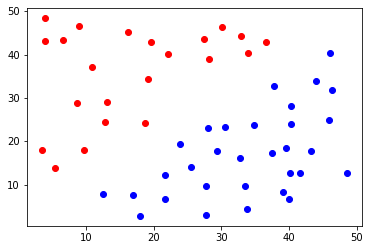

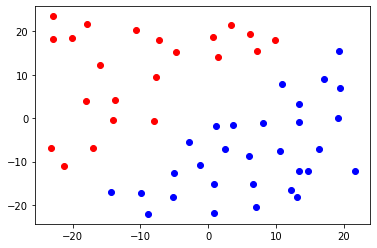

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

data1 = sio.loadmat('perceptron_data_class1.mat')
data2 = sio.loadmat('perceptron_data_class2.mat')

# data at class 1 and class 2
data1 = data1['perceptron_data_class1']
data2 = data2['perceptron_data_class2']

# put your code here
# plot data 1 as class red and data 2 as class blue
plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.show()

##########
# create single data and targets arrays

# targets vector
target1 = np.ones((np.shape(data1)[0], 1))
target2 = -np.ones((np.shape(data2)[0],1))

targets = np.vstack((target1, target2))

# vector containing all data points
data = np.vstack((data1, data2))

##########
# center data

# find the mean of each row
centerMass = np.mean(data, axis=0)
centerMass = np.expand_dims(centerMass, 1)

# center the data into the origin
centeredData = data - np.matmul(np.ones((np.shape(data)[0],1)), \
                                 centerMass.T)

##########
# create new arrays to hold the centered versions of the data
class1Length = np.shape(data1)[0] 
class2Length = np.shape(data2)[0] 

centeredData1 = centeredData[:class1Length,:]
centeredData2 = centeredData[class1Length:,:]

##########

# plot centered data
plt.scatter(centeredData[: class1Length, 0], \
            centeredData[: class1Length, 1], c='r')
plt.scatter(centeredData[class1Length : class1Length + class2Length - 1, 0], \
            centeredData[class1Length : class1Length + class2Length - 1, 1], c='b')
plt.show()

[[0.78477602]
 [0.02204464]]


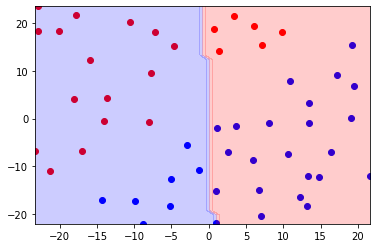

In [2]:
# create random beta
beta = np.random.normal(0, 1, (2, 1))
print(beta)

# append intercept
beta0 = 0
beta = np.vstack((beta0, beta))

# create mesh
x1Min = np.min(centeredData[:,0])
x1Max = np.max(centeredData[:,0])

x2Min = np.min(centeredData[:,1])
x2Max = np.max(centeredData[:,1])

xx, yy = np.meshgrid(np.linspace(x1Min, x1Max, 50), np.linspace(x2Min, x2Max, 50))

# create x tilde array by stacking xx and yy
xxTilde = np.hstack((np.expand_dims(xx.flatten(), 1), np.expand_dims(yy.flatten(), 1)))
# add 1s for beta0
xxTilde = np.hstack((np.ones((len(xx.flatten()), 1)), xxTilde))

# create prediction using random beta
prediction = np.matmul(xxTilde, beta)

# clean prediction (1s or -1s)
final_prediction = (prediction > 0) * 2 - 1

# plot data and background mesh
plt.scatter(centeredData[: class1Length, 0], \
            centeredData[: class1Length, 1], c='r')
plt.scatter(centeredData[class1Length : class1Length + class2Length - 1, 0], \
            centeredData[class1Length : class1Length + class2Length - 1, 1], c='b')
plt.contourf(xx, yy, np.reshape(final_prediction, \
                                np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()

In [3]:
# create xtilde
xTilde = np.hstack((np.ones((centeredData.shape[0], 1)), centeredData))

# predict classifications
dataPrediction = np.matmul(xTilde, beta)
dataPrediction = (dataPrediction > 0) * 2 - 1

# find all misclassified points
misclassifiedPoints = centeredData[np.squeeze(np.not_equal(targets, dataPrediction))]
misclassifiedTargets = targets[np.squeeze(np.not_equal(targets, dataPrediction))]

##########
# loop over misclassified points until none are left
# while (len(misclassifiedPoints) > 0):
for i in range(10):
    # grab xi and ti
    xi = misclassifiedPoints[0, :]
    ti = misclassifiedTargets[0, :]
    xiTilde = np.hstack((1, xi))
    
    # compute gradient
    learningRate = 0.1
    beta = beta - (learningRate * ti * xiTilde).reshape(-1, 1)
    
    # compute prediction again
    dataPrediction = np.matmul(xTilde, beta)
    dataPrediction = (dataPrediction > 0) * 2 - 1
    misclassifiedPoints = centeredData[np.squeeze(np.not_equal(targets, dataPrediction))]
    misclassifiedTargets = targets[np.squeeze(np.not_equal(targets, dataPrediction))]

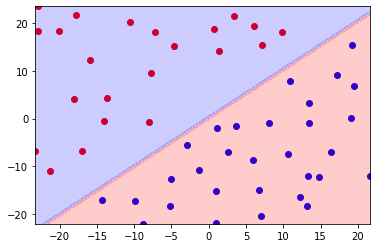

In [4]:
# calculate final prediction
prediction = np.matmul(xxTilde, beta)
finalPrediction = (prediction > 0) *2 -1

# plot final perceptron prediction
plt.scatter(centeredData[: class1Length, 0], \
            centeredData[: class1Length, 1], c='r')
plt.scatter(centeredData[class1Length : class1Length + class2Length - 1, 0], \
            centeredData[class1Length : class1Length + class2Length - 1, 1], c='b')
plt.contourf(xx, yy, np.reshape(finalPrediction, \
                                np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()

#### Exercise 2.

__2a.__ Load the data below. Using the neural_network module from scikit-learn and its MLPClassifier model, learn a classifier, for the dataset below using 

- One hidden layer with a linear activation function and 
    - One neuron
    - Two neurons
    
    
    
- One hidden layer with a non linear activation function (take Relu for example or a binary step)
    - One neuron
    - Two neurons

How many neurons, hidden layers do you need to learn the distribution of the data? Do you have an idea why?

Try increasing the number of neurons and hidden layers. Then try different values of the learning rate. 


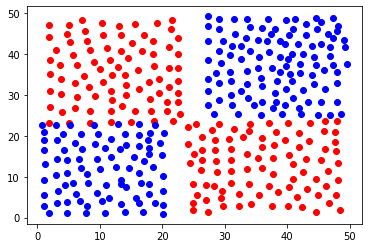

In [5]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# import data
data1 = sio.loadmat('neural_net_class1.mat')
data2 = sio.loadmat('neural_net_class2.mat')
data1 = data1['neural_net_class1']
data2 = data2['neural_net_class2']

# plot data
plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.show()

/home/pedro/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


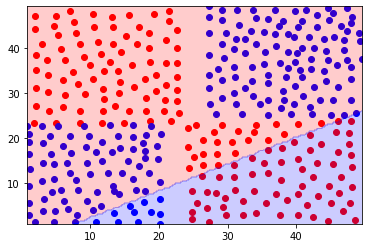

In [6]:
# neural net with only one neuron

# combine data
data = np.vstack((data1, data2))

# create targets array
targets1 = np.ones((np.shape(data1)[0], 1))
targets2 = np.zeros((np.shape(data2)[0], 1))
target = np.vstack((targets1, targets2))

# create neural network using a logistic activation and 1 layer
classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(1,), activation="logistic", solver="lbfgs")
# train network
classifier.fit(data, target)

##########
# create mesh
x1Min = np.min(data[:, 0])
x1Max = np.max(data[:, 0])
x2Min = np.min(data[:, 1])
x2Max = np.max(data[:, 1])

xx, yy = np.meshgrid(np.linspace(x1Min, x1Max, 100), np.linspace(x2Min, x2Max, 100))

# calculate prediction using model
xPredict = np.vstack((xx.flatten(), yy.flatten())).T
prediction = classifier.predict(xPredict)

# plot
plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.contourf(xx, yy, np.reshape(prediction > 0.5, np.shape(xx)), levels=2, alpha=0.2, cmap=cm_bright)
plt.show()

__2b.__ Keep the dataset from above. try to change the intialization of the training algorithm. Plot the resulting classifier for a couple of different initializations. What do you see?

Do it for a small network first. Then repeat those experiments for larger architectures. I.e. increase the number of neurons and the number of layers. What do you see when you change the initialization?


In [7]:
# create neural network using a logistic activation and multiple layers
# classifier = MLPClassifier(max_iter=2000, hidden_layer_sizes=(50, 50), activation="logistic", solver="lbfgs", alpha=0.1)
# # train network
# classifier.fit(data, target)

##########
# create mesh
# x1Min = np.min(data[:, 0])
# x1Max = np.max(data[:, 0])
# x2Min = np.min(data[:, 1])
# x2Max = np.max(data[:, 1])

# xx, yy = np.meshgrid(np.linspace(x1Min, x1Max, 100), np.linspace(x2Min, x2Max, 100))

# # calculate prediction using model
# xPredict = np.vstack((xx.flatten(), yy.flatten())).T
# prediction = classifier.predict(xPredict)

# # plot
# plt.scatter(data1[:,0], data1[:,1], c='r')
# plt.scatter(data2[:,0], data2[:,1], c='b')
# plt.contourf(xx, yy, np.reshape(prediction > 0.5, np.shape(xx)), levels=2, alpha=0.2, cmap=cm_bright)
# plt.show()

my_classifier = MLPClassifier(max_iter=2000, \
                              hidden_layer_sizes = (50,50), \
                              activation = 'logistic', solver = 'lbfgs')
my_classifier.fit(data, np.ravel(target))


x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

xx, yy = np.meshgrid(np.linspace(x1min,x1max, 100), np.linspace(x2min, x2max, 100))

Xprediction = np.vstack((xx.flatten(), yy.flatten()))
Xprediction = Xprediction.T
predicted_targets = my_classifier.predict(Xprediction)

plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.contourf(xx, yy, np.reshape(predicted_targets>0.5, np.shape(xx)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()

AttributeError: 'str' object has no attribute 'decode'

#### Exercise 3. 

__3a.__Load the data below. Try to build the best neural network you can for this dataset. Split the data between a training and a test set and evaluate the models you built. What is the best validation error you can get?


In [ ]:

import scipy.io as sio
data1 = sio.loadmat('neural_net_ex2_class1.mat')
data2 = sio.loadmat('neural_net_ex2_class2.mat')

data1 = data1['neural_net_ex2_class1']
data2 = data2['neural_net_ex2_class2']

from sklearn.neural_network import MLPClassifier


# put your code here


__3b.__ With the same dataset, add additional features to your model, e.g. $\sin(x), \sin(y)$ or other monomials. Can you improve your classifier ?

In [ ]:
# put your code here


